In [106]:
import pandas as pd #For DataFrames
import numpy as np #Mathmatical Operations
import seaborn as sns #Plotting
import matplotlib.pyplot as plt #Plotting

# Load the data

In [107]:
candy = pd.read_excel("candyhierarchy2017.xlsx")

# Show the first five rows

In [108]:
candy.head()

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,...,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,...,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(84, 25)"
2,90272829,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90272840,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,...,NaN,Raisins can go to hell,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(75, 23)"
4,90272841,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,...,NaN,NaN,White and gold,NaN,Friday,NaN,1.0,NaN,NaN,"(70, 10)"



# Shap of data

In [109]:
candy.shape

(2460, 120)

# Columns of data

In [110]:
candy.columns

Index(['Internal ID', 'Q1: GOING OUT?', 'Q2: GENDER', 'Q3: AGE', 'Q4: COUNTRY',
       'Q5: STATE, PROVINCE, COUNTY, ETC', 'Q6 | 100 Grand Bar',
       'Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)',
       'Q6 | Any full-sized candy bar', 'Q6 | Black Jacks',
       ...
       'Q8: DESPAIR OTHER', 'Q9: OTHER COMMENTS', 'Q10: DRESS', 'Unnamed: 113',
       'Q11: DAY', 'Q12: MEDIA [Daily Dish]', 'Q12: MEDIA [Science]',
       'Q12: MEDIA [ESPN]', 'Q12: MEDIA [Yahoo]', 'Click Coordinates (x, y)'],
      dtype='object', length=120)

# The first problem we can see , the columns's name need to clean 

In [111]:
candy.rename(columns=lambda x: x[4:], inplace=True)

In [112]:
candy.head()

,rnal ID,GOING OUT?,GENDER,AGE,COUNTRY,"STATE, PROVINCE, COUNTY, ETC",100 Grand Bar,Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Any full-sized candy bar,Black Jacks,...,DESPAIR OTHER,OTHER COMMENTS,DRESS,med: 113,DAY,MEDIA [Daily Dish],MEDIA [Science],MEDIA [ESPN],MEDIA [Yahoo],"k Coordinates (x, y)"
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,...,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(84, 25)"
2,90272829,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90272840,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,...,NaN,Raisins can go to hell,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(75, 23)"
4,90272841,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,...,NaN,NaN,White and gold,NaN,Friday,NaN,1.0,NaN,NaN,"(70, 10)"


In [113]:
#remove the space berfore the columns name
candy.columns = [col.strip() for col in candy.columns]

In [114]:
candy.columns

Index(['rnal ID', 'GOING OUT?', 'GENDER', 'AGE', 'COUNTRY',
       'STATE, PROVINCE, COUNTY, ETC', '100 Grand Bar',
       'Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)',
       'Any full-sized candy bar', 'Black Jacks',
       ...
       'DESPAIR OTHER', 'OTHER COMMENTS', 'DRESS', 'med: 113', 'DAY',
       'MEDIA [Daily Dish]', 'MEDIA [Science]', 'MEDIA [ESPN]',
       'MEDIA [Yahoo]', 'k Coordinates (x, y)'],
      dtype='object', length=120)

# rename the columns

In [115]:
candy.rename(columns={'rnal ID':'ID','STATE, PROVINCE, COUNTY, ETC':'STATE','100 Grand Bar':'Grand Bar',
 'Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)':'Anonymous brown globs',
     'k Coordinates (x, y)':'Coordinates',
    'Vials of pure high fructose corn syrup, for main-lining into your vein':'Vials of pure high fructose corn syrup'  },
            inplace=True)

In [116]:
candy.columns

Index(['ID', 'GOING OUT?', 'GENDER', 'AGE', 'COUNTRY', 'STATE', 'Grand Bar',
       'Anonymous brown globs', 'Any full-sized candy bar', 'Black Jacks',
       ...
       'DESPAIR OTHER', 'OTHER COMMENTS', 'DRESS', 'med: 113', 'DAY',
       'MEDIA [Daily Dish]', 'MEDIA [Science]', 'MEDIA [ESPN]',
       'MEDIA [Yahoo]', 'Coordinates'],
      dtype='object', length=120)

# when we take a look at the excel file of data ,we can see (med: 113 and MEDIA [Daily Dish])columns is empty ,so we will drop them

In [117]:
candy.drop(columns=['med: 113'], axis=1, inplace=True)

In [118]:
candy.head()

,ID,GOING OUT?,GENDER,AGE,COUNTRY,STATE,Grand Bar,Anonymous brown globs,Any full-sized candy bar,Black Jacks,...,JOY OTHER,DESPAIR OTHER,OTHER COMMENTS,DRESS,DAY,MEDIA [Daily Dish],MEDIA [Science],MEDIA [ESPN],MEDIA [Yahoo],Coordinates
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,...,Mounds,NaN,Bottom line is Twix is really the only candy w...,White and gold,Sunday,NaN,1.0,NaN,NaN,"(84, 25)"
2,90272829,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90272840,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,...,"Reese's crispy crunchy bars, 5th avenue bars, ...",NaN,Raisins can go to hell,White and gold,Sunday,NaN,1.0,NaN,NaN,"(75, 23)"
4,90272841,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,...,NaN,NaN,NaN,White and gold,Friday,NaN,1.0,NaN,NaN,"(70, 10)"


# Check info to see if there are missing values

In [119]:
candy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Columns: 119 entries, ID to Coordinates
dtypes: float64(4), int64(1), object(114)
memory usage: 1.2+ MB


# check the number of missing value

In [120]:
candy.isnull().sum()

ID                       0
GOING OUT?             110
GENDER                  41
AGE                     84
COUNTRY                 64
                      ... 
MEDIA [Daily Dish]    2375
MEDIA [Science]       1098
MEDIA [ESPN]          2361
MEDIA [Yahoo]         2393
Coordinates            855
Length: 119, dtype: int64

In [121]:
candy.shape

(2460, 119)

# We can see (MEDIA [Daily Dish] , MEDIA [Science] , MEDIA [ESPN] and MEDIA [Yahoo])columns have alot of missing value , so we will drop them

In [122]:
candy.drop(columns=['MEDIA [Daily Dish]','MEDIA [Science]','MEDIA [ESPN]','MEDIA [Yahoo]'], axis=1 , inplace=True)

In [123]:
candy.shape

(2460, 115)

# the data is categrical ,so we will trun all nan into mode

In [124]:
candy.fillna(candy.mode(), inplace=True)

In [125]:
candy.head()

,ID,GOING OUT?,GENDER,AGE,COUNTRY,STATE,Grand Bar,Anonymous brown globs,Any full-sized candy bar,Black Jacks,...,Whatchamacallit Bars,White Bread,Whole Wheat anything,York Peppermint Patties,JOY OTHER,DESPAIR OTHER,OTHER COMMENTS,DRESS,DAY,Coordinates
0,90258773,No,Male,40,USA,California,JOY,DESPAIR,JOY,DESPAIR,...,JOY,DESPAIR,DESPAIR,JOY,Almond Joy,Trump,nom nom nom!,White and gold,Friday,"(77, 24)"
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,...,DESPAIR,DESPAIR,DESPAIR,DESPAIR,Mounds,NaN,Bottom line is Twix is really the only candy w...,White and gold,Sunday,"(84, 25)"
2,90272829,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90272840,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,...,JOY,DESPAIR,DESPAIR,DESPAIR,"Reese's crispy crunchy bars, 5th avenue bars, ...",NaN,Raisins can go to hell,White and gold,Sunday,"(75, 23)"
4,90272841,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,...,JOY,DESPAIR,DESPAIR,JOY,NaN,NaN,NaN,White and gold,Friday,"(70, 10)"


# check missing value again

In [126]:
candy.isnull().sum()

ID                   0
GOING OUT?         109
GENDER              40
AGE                 83
COUNTRY             63
                  ... 
DESPAIR OTHER     1742
OTHER COMMENTS    2073
DRESS              743
DAY                724
Coordinates        854
Length: 115, dtype: int64

# drop (JOY OTHER ,DESPAIR OTHER and OTHER COMMENTS) columns

In [127]:
candy.drop(columns=['DESPAIR OTHER','OTHER COMMENTS','JOY OTHER'],axis=1 , inplace=True)

# check the missing value again

In [128]:
candy.isnull().sum()

ID                           0
GOING OUT?                 109
GENDER                      40
AGE                         83
COUNTRY                     63
                          ... 
Whole Wheat anything       746
York Peppermint Patties    704
DRESS                      743
DAY                        724
Coordinates                854
Length: 112, dtype: int64

# shape of data

In [129]:
candy.shape

(2460, 112)

# Drop the rest of missing value

In [130]:
candy.dropna(inplace=True)

# check the missing for the last time

In [131]:
candy.isnull().values.any()

False

# Now the data is not has any nan value

In [132]:
candy.shape

(848, 112)

In [133]:
candy.head()

,ID,GOING OUT?,GENDER,AGE,COUNTRY,STATE,Grand Bar,Anonymous brown globs,Any full-sized candy bar,Black Jacks,...,Twix,Vials of pure high fructose corn syrup,Vicodin,Whatchamacallit Bars,White Bread,Whole Wheat anything,York Peppermint Patties,DRESS,DAY,Coordinates
0,90258773,No,Male,40,USA,California,JOY,DESPAIR,JOY,DESPAIR,...,JOY,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,JOY,White and gold,Friday,"(77, 24)"
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,...,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,White and gold,Sunday,"(84, 25)"
3,90272840,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,...,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,DESPAIR,White and gold,Sunday,"(75, 23)"
8,90272858,No,Male,40,Canada,Ontario,JOY,DESPAIR,JOY,MEH,...,JOY,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,Blue and black,Sunday,"(76, 24)"
14,90272868,No,Female,37,Canada,Ontario,MEH,JOY,JOY,MEH,...,JOY,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,JOY,Blue and black,Sunday,"(75, 25)"


# Now we will show the value of each column

In [134]:
candy['AGE'].unique()

array([40, 44, 37, 59, 48, 35, 58, 50, 52, 41, 34, 53, 62, 42, 38, 28, 45,
       69, 47, 67, 33, 25, 54, 51, 70, 43, 24, 27, 18, 49, 'Old enough',
       57, 66, 32, 'Many', 60, 39, 55, 65, 64, '?', 11, 36, 20, 46, 6, 10,
       63, 71, 12, 26, 312, 56, 61, 72, 31, 99, 29, 'hahahahaha', 30, 22,
       13, 102, 'older than dirt', 15, 23, 'See question 2', 14, 100,
       1000, 'ancient', 21, 16, 'MY NAME JEFF', 19], dtype=object)

# replace the some values in the column

In [135]:
candy['AGE'] = candy['AGE'].replace({"Many": np.nan, "?": np.nan, "Old enough": np.nan, 'hahahahaha': np.nan,
          "older than dirt": np.nan, "See question 2" : np.nan, "ancient": np.nan , "MY NAME JEFF" : np.nan  })

# clean nan values with bfill 

In [136]:
candy.fillna(method='bfill',inplace=True)

# show the values again

In [137]:
candy['AGE'].unique()

array([  40.,   44.,   37.,   59.,   48.,   35.,   58.,   50.,   52.,
         41.,   34.,   53.,   62.,   42.,   38.,   28.,   45.,   69.,
         47.,   67.,   33.,   25.,   54.,   51.,   70.,   43.,   24.,
         27.,   18.,   49.,   57.,   66.,   32.,   60.,   39.,   55.,
         65.,   64.,   11.,   36.,   20.,   46.,    6.,   10.,   63.,
         71.,   12.,   26.,  312.,   56.,   61.,   72.,   31.,   99.,
         29.,   30.,   22.,   13.,  102.,   15.,   23.,   14.,  100.,
       1000.,   21.,   16.,   19.])

# show the values of COUNTRY column

In [138]:
candy['COUNTRY'].unique()

array(['USA', 'USA ', 'us', 'Canada', 'US', 'United States',
       'United States of America', 'United States ', 'canada',
       'United states', 'Usa', 'united states', 'america', 'usa',
       'U.S.A.', 'Mexico', 'united states of america', 'US of A', 'UK',
       'Unites States', 'North Carolina ', 'United Kingdom',
       'United States of America ', 'The United States of America',
       'insanity lately', 'USA? Hard to tell anymore..', 'u.s.', 'Us',
       'A', 'Can', 'Ireland', 'United Sates', 'California', 'USa',
       'I pretend to be from Canada, but I am really from the United States.',
       'Usa ', 'Scotland', 'Denmark', 'France ', 'Japan',
       'Ahem....Amerca', 'New Jersey', 'United Stated', 'Germany',
       'Netherlands', 'U.S.', 'endland', 'United State', 'Atlantis',
       'murrika', 'united States ', 'N. America', 'spain', 'Narnia',
       'u s a', 'United Statea', 'subscribe to dm4uz3 on youtube',
       'USA USA USA!!!!', "I don't know anymore"], dtype=objec

In [139]:
candy['COUNTRY']=candy['COUNTRY'].replace({'USA? Hard to tell anymore..':np.nan, 'subscribe to dm4uz3 on youtube':np.nan,
      'USA USA USA!!!!':np.nan, "I don't know anymore":np.nan})

In [140]:
candy.fillna(method='bfill',inplace=True)

In [141]:
candy['COUNTRY'].unique()

array(['USA', 'USA ', 'us', 'Canada', 'US', 'United States',
       'United States of America', 'United States ', 'canada',
       'United states', 'Usa', 'united states', 'america', 'usa',
       'U.S.A.', 'Mexico', 'united states of america', 'US of A', 'UK',
       'Unites States', 'North Carolina ', 'United Kingdom',
       'United States of America ', 'The United States of America',
       'insanity lately', 'u.s.', 'Us', 'A', 'Can', 'Ireland',
       'United Sates', 'California', 'USa',
       'I pretend to be from Canada, but I am really from the United States.',
       'Usa ', 'Scotland', 'Denmark', 'France ', 'Japan',
       'Ahem....Amerca', 'New Jersey', 'United Stated', 'Germany',
       'Netherlands', 'U.S.', 'endland', 'United State', 'Atlantis',
       'murrika', 'united States ', 'N. America', 'spain', 'Narnia',
       'u s a', 'United Statea'], dtype=object)

# Show values of STATE

In [142]:
candy['STATE'].unique()

array(['California', 'NM', 'or', 'Ontario', 'NEW YORK', 'CO', 'Michigan',
       'New Jersey', 'Colorado', 'Los Angeles, California',
       'Chicago, Illinois', 'TEXAS', 'District of Columbia', 'Illinois',
       'New York', 'Alberta', 'CA', 'Florida', 'MN', 'Pennsylvania ',
       'Alberta ', 'DC', 'Ohio', 'Maryland', 'ontario', 'MI',
       'Wisconsin ', 'Louisiana', 'pa', 'Texas', 'CO, Larimer County',
       'Nebraska ', 'UT', 'Wisconsin', 'north carolina', 'minnesota',
       'Knox county, Tennessee', 'New Mexico', 'WA', 'Virginia',
       'Illinois ', 'OR', 'Il', 'Oregon', 'New Hampshire ', 'Georgia',
       'IL', 'Washington, Clark ', 'NE', 'Oklahoma', 'Nevada', 'va',
       'California ', 'Oregon - but will be in Washington for Halloween',
       'Ri', 'Washington, King', 'Massachusetts ', 'mi', 'wa', 'PA',
       'North Carolina', 'pennsylvania', 'GA', 'BC', 'california ', 'MA',
       'Baja California', 'IN', 'Massachusetts', 'Ny', 'illinois',
       'MARYLAND', 'Quebec', 'C

In [143]:
candy.head()

,ID,GOING OUT?,GENDER,AGE,COUNTRY,STATE,Grand Bar,Anonymous brown globs,Any full-sized candy bar,Black Jacks,...,Twix,Vials of pure high fructose corn syrup,Vicodin,Whatchamacallit Bars,White Bread,Whole Wheat anything,York Peppermint Patties,DRESS,DAY,Coordinates
0,90258773,No,Male,40.0,USA,California,JOY,DESPAIR,JOY,DESPAIR,...,JOY,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,JOY,White and gold,Friday,"(77, 24)"
1,90272821,No,Male,44.0,USA,NM,MEH,DESPAIR,JOY,MEH,...,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,White and gold,Sunday,"(84, 25)"
3,90272840,No,Male,40.0,us,or,MEH,DESPAIR,JOY,MEH,...,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,DESPAIR,White and gold,Sunday,"(75, 23)"
8,90272858,No,Male,40.0,Canada,Ontario,JOY,DESPAIR,JOY,MEH,...,JOY,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,DESPAIR,Blue and black,Sunday,"(76, 24)"
14,90272868,No,Female,37.0,Canada,Ontario,MEH,JOY,JOY,MEH,...,JOY,DESPAIR,MEH,JOY,DESPAIR,DESPAIR,JOY,Blue and black,Sunday,"(75, 25)"


# Check if there are outliers 

In [144]:
Q1 = candy.quantile(0.25)
Q3 = candy.quantile(0.75)
IQR = Q3 - Q1
x = (Q1 - 1.5 * IQR)
y = (Q3 + 1.5 * IQR)
((candy < x ) | (candy > y)).sum()


AGE                         14
Abstained from M&M'ing.      0
Anonymous brown globs        0
Any full-sized candy bar     0
Black Jacks                  0
                            ..
Vicodin                      0
Whatchamacallit Bars         0
White Bread                  0
Whole Wheat anything         0
York Peppermint Patties      0
Length: 112, dtype: int64

We will use boxplot to show the oytliers

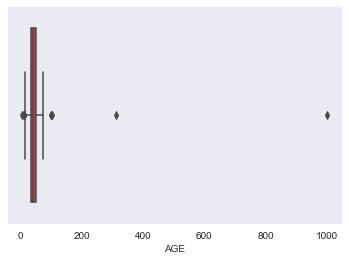

In [145]:
sns.boxplot(candy['AGE'])
plt.show()

# Treat the outliers

In [146]:
new=candy[['AGE']]
Q1 = new.quantile(0.25)
Q3 = new.quantile(0.75)
IQR = Q3-Q1
minimum = Q1 - 1.5*IQR
maximum = Q3 + 1.5*IQR
cond = (new <= maximum) & (new >= minimum)
cond = cond.all(axis=1)
candy= candy[cond]

In [147]:
candy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 834 entries, 0 to 2459
Columns: 112 entries, ID to Coordinates
dtypes: float64(1), int64(1), object(110)
memory usage: 377.9+ KB


Finally data is clean

# Plot feelings when  recieving candy corn
we use countplot() because data is categocial

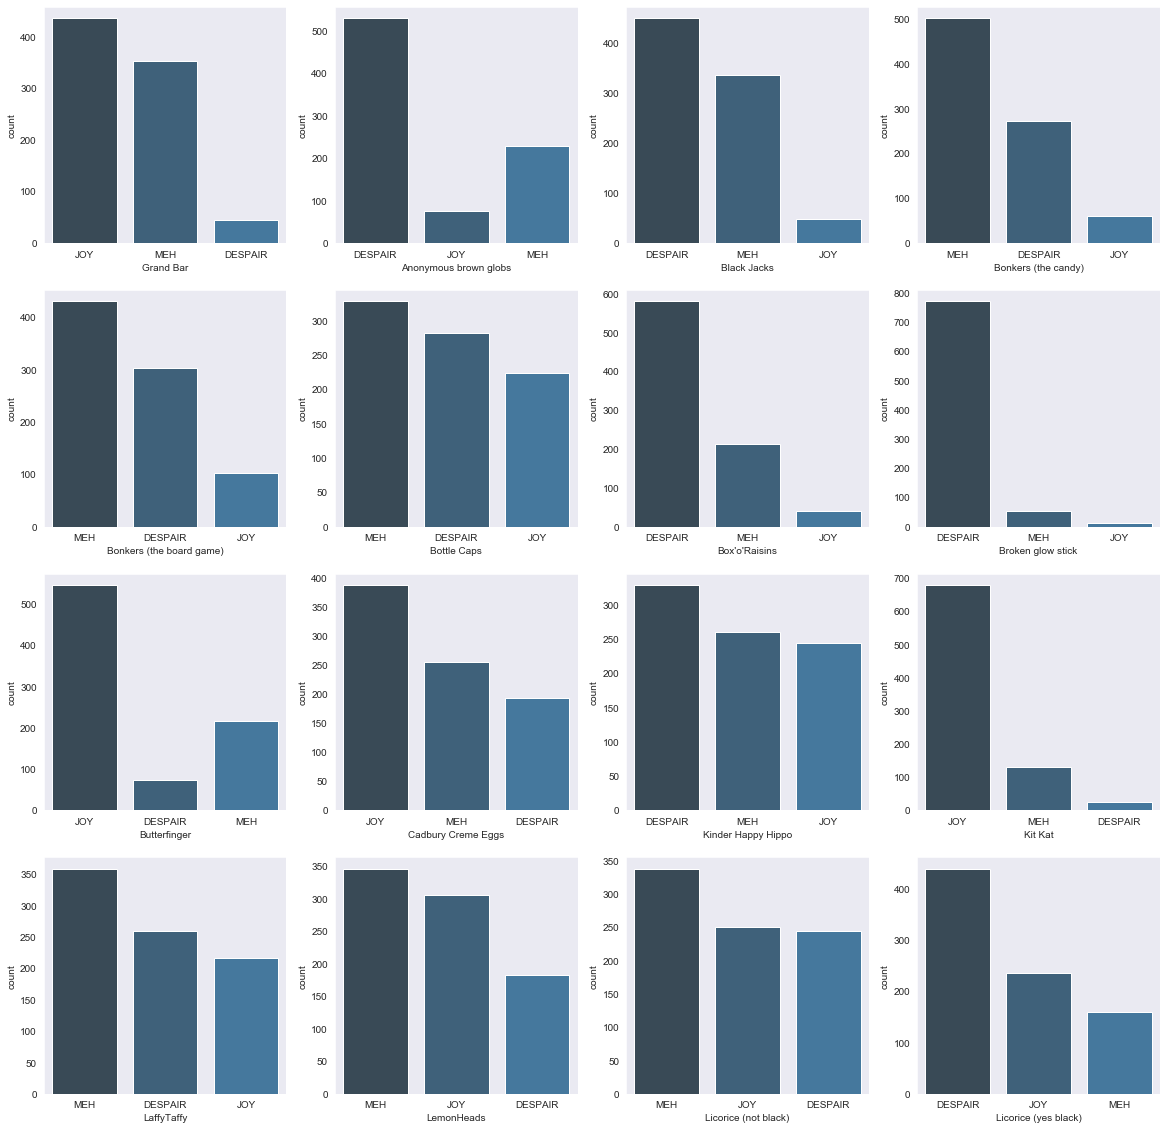

In [148]:
plt.figure(figsize=(20,20))
sns.set_palette("Blues_d")
sns.set_style('dark')
plt.subplot(4,4,1)
sns.countplot(candy['Grand Bar'])
plt.subplot(4,4,2)
sns.countplot(candy['Anonymous brown globs'])
plt.subplot(4,4,3)
sns.countplot(candy['Black Jacks'])
plt.subplot(4,4,4)
sns.countplot(candy['Bonkers (the candy)'])
plt.subplot(4,4,5)
sns.countplot(candy['Bonkers (the board game)'])
plt.subplot(4,4,6)
sns.countplot(candy['Bottle Caps'])
plt.subplot(4,4,7)
sns.countplot(candy["Box'o'Raisins"])
plt.subplot(4,4,8)
sns.countplot(candy['Broken glow stick'])
plt.subplot(4,4,9)
sns.countplot(candy['Butterfinger'])
plt.subplot(4,4,10)
sns.countplot(candy['Cadbury Creme Eggs'])
plt.subplot(4,4,11)
sns.countplot(candy['Kinder Happy Hippo'])
plt.subplot(4,4,12)
sns.countplot(candy['Kit Kat'])
plt.subplot(4,4,13)
sns.countplot(candy['LaffyTaffy'])
plt.subplot(4,4,14)
sns.countplot(candy['LemonHeads'])
plt.subplot(4,4,15)
sns.countplot(candy['Licorice (not black)'])
plt.subplot(4,4,16)
sns.countplot(candy['Licorice (yes black)'])
plt.show()

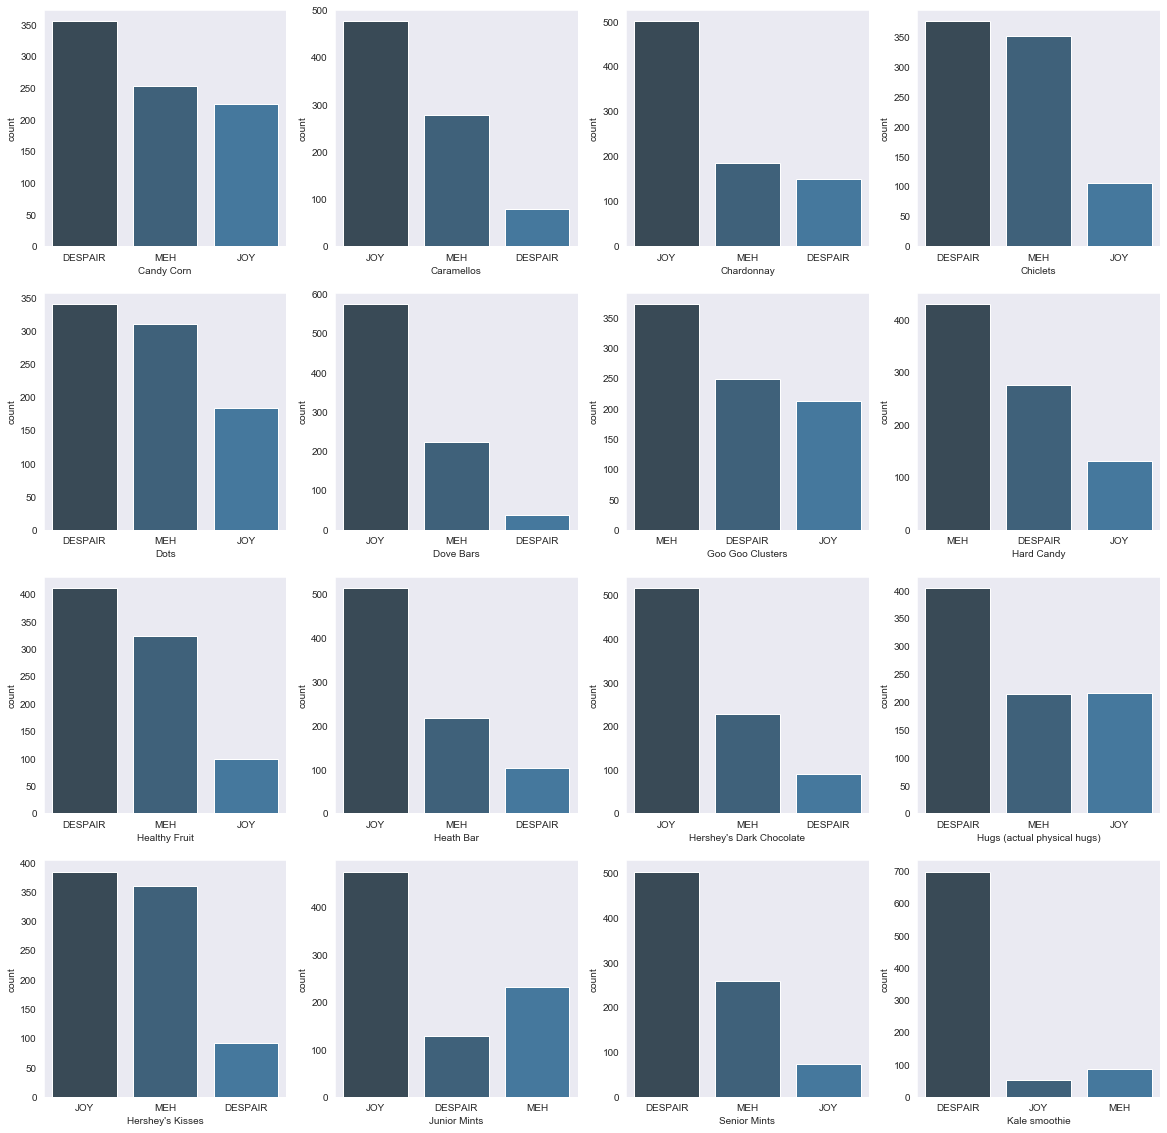

In [149]:
plt.figure(figsize=(20,20))
plt.subplot(4,4,1)
sns.countplot(candy["Candy Corn"]) 
plt.subplot(4,4,2)
sns.countplot(candy["Caramellos"])
plt.subplot(4,4,3)
sns.countplot(candy["Chardonnay"])
plt.subplot(4,4,4)
sns.countplot(candy["Chiclets"])
plt.subplot(4,4,5)
sns.countplot(candy["Dots"])
plt.subplot(4,4,6)
sns.countplot(candy["Dove Bars"])
plt.subplot(4,4,7)
sns.countplot(candy["Goo Goo Clusters"])
plt.subplot(4,4,8)
sns.countplot(candy["Hard Candy"])
plt.subplot(4,4,9)
sns.countplot(candy["Healthy Fruit"])
plt.subplot(4,4,10)
sns.countplot(candy["Heath Bar"])
plt.subplot(4,4,11)
sns.countplot(candy["Hershey's Dark Chocolate"])
plt.subplot(4,4,12)
sns.countplot(candy["Hugs (actual physical hugs)"])
plt.subplot(4,4,13)
sns.countplot(candy["Hershey's Kisses"])
plt.subplot(4,4,14)
sns.countplot(candy["Junior Mints"])
plt.subplot(4,4,15)
sns.countplot(candy["Senior Mints"])
plt.subplot(4,4,16)
sns.countplot(candy["Kale smoothie"])
plt.show() 

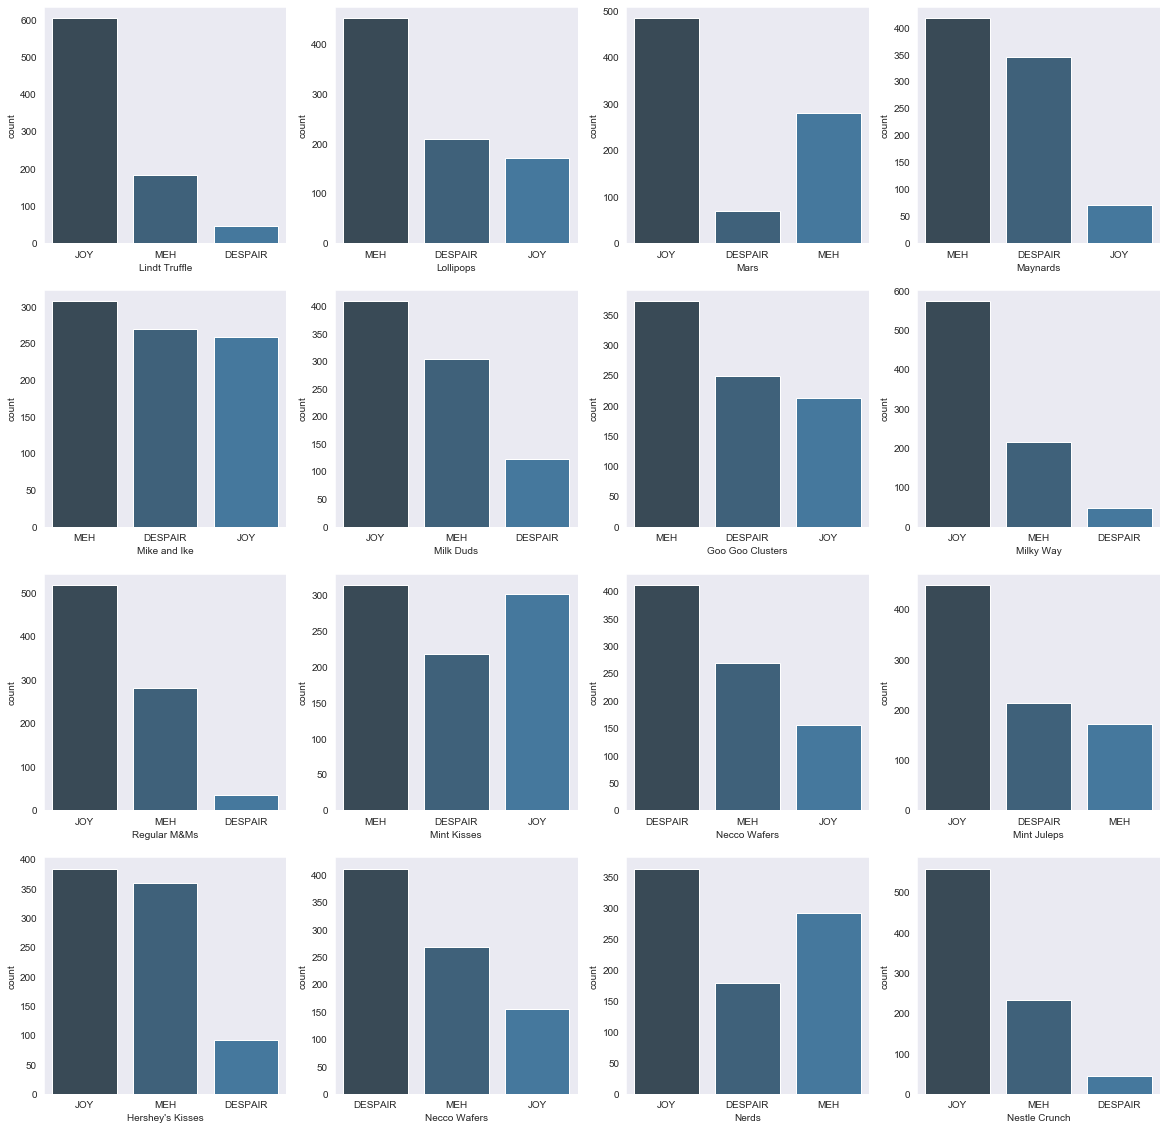

In [150]:
plt.figure(figsize=(20,20))
plt.subplot(4,4,1)
sns.countplot(candy["Lindt Truffle"]) 
plt.subplot(4,4,2)
sns.countplot(candy["Lollipops"])
plt.subplot(4,4,3)
sns.countplot(candy["Mars"])
plt.subplot(4,4,4)
sns.countplot(candy["Maynards"])
plt.subplot(4,4,5)
sns.countplot(candy["Mike and Ike"])
plt.subplot(4,4,6)
sns.countplot(candy["Milk Duds"])
plt.subplot(4,4,7)
sns.countplot(candy["Goo Goo Clusters"])
plt.subplot(4,4,8)
sns.countplot(candy["Milky Way"])
plt.subplot(4,4,9)
sns.countplot(candy["Regular M&Ms"])
plt.subplot(4,4,10)
sns.countplot(candy["Mint Kisses"])
plt.subplot(4,4,11)
sns.countplot(candy["Necco Wafers"])
plt.subplot(4,4,12)
sns.countplot(candy["Mint Juleps"])
plt.subplot(4,4,13)
sns.countplot(candy["Hershey's Kisses"])
plt.subplot(4,4,14)
sns.countplot(candy["Necco Wafers"])
plt.subplot(4,4,15)
sns.countplot(candy["Nerds"])
plt.subplot(4,4,16)
sns.countplot(candy["Nestle Crunch"])
plt.show() 


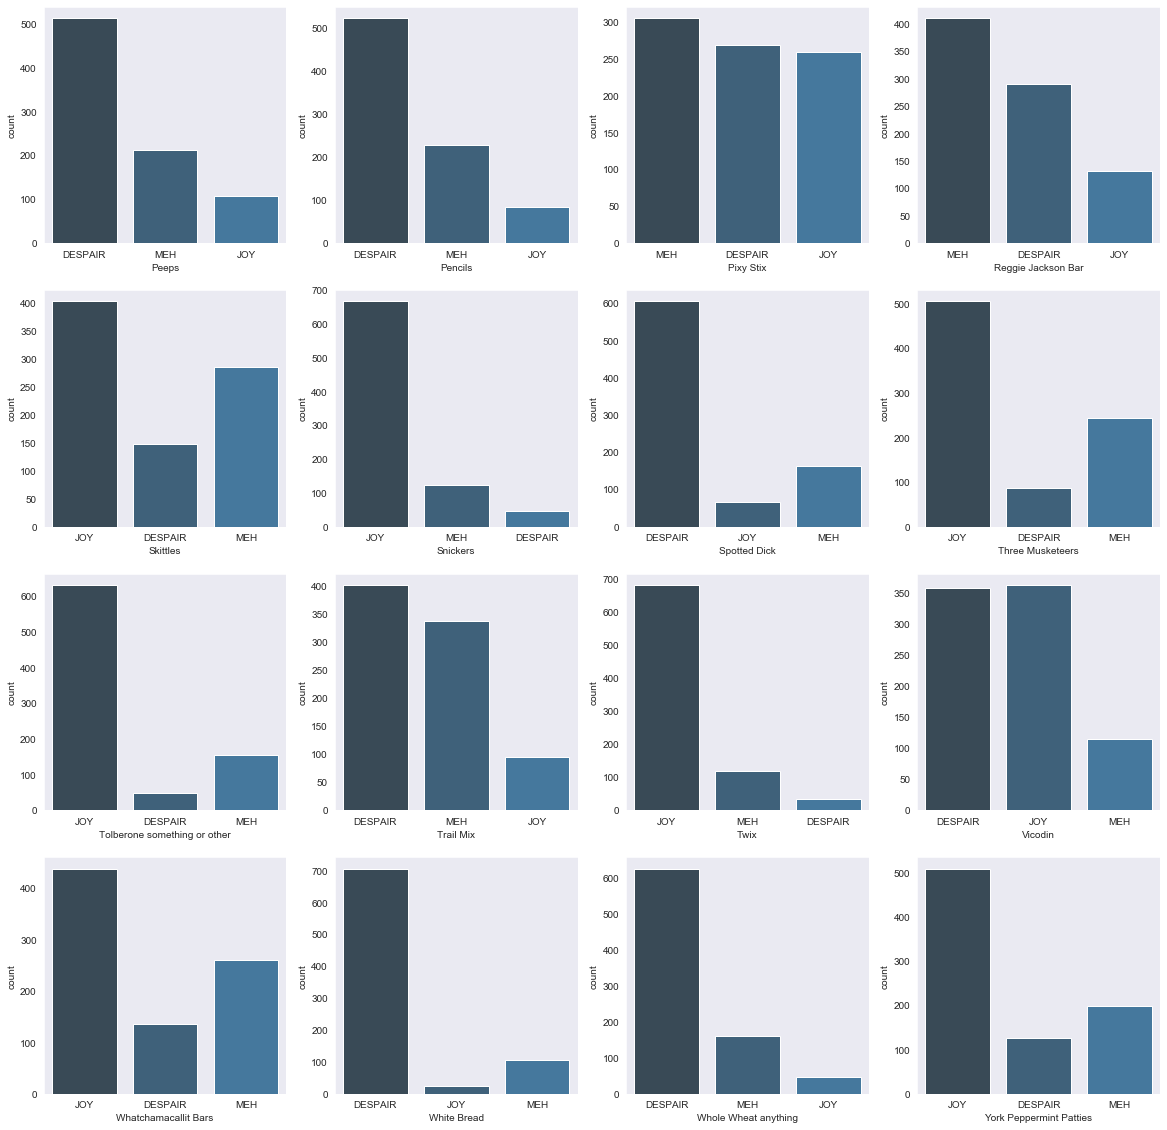

In [151]:
plt.figure(figsize=(20,20))
plt.subplot(4,4,1)
sns.countplot(candy["Peeps"]) 
plt.subplot(4,4,2)
sns.countplot(candy["Pencils"])
plt.subplot(4,4,3)
sns.countplot(candy["Pixy Stix"])
plt.subplot(4,4,4)
sns.countplot(candy["Reggie Jackson Bar"])
plt.subplot(4,4,5)
sns.countplot(candy["Skittles"])
plt.subplot(4,4,6)
sns.countplot(candy["Snickers"])
plt.subplot(4,4,7)
sns.countplot(candy["Spotted Dick"])
plt.subplot(4,4,8)
sns.countplot(candy["Three Musketeers"])
plt.subplot(4,4,9)
sns.countplot(candy["Tolberone something or other"])
plt.subplot(4,4,10)
sns.countplot(candy["Trail Mix"])
plt.subplot(4,4,11)
sns.countplot(candy["Twix"])
plt.subplot(4,4,12)
sns.countplot(candy["Vicodin"])
plt.subplot(4,4,13)
sns.countplot(candy["Whatchamacallit Bars"])
plt.subplot(4,4,14)
sns.countplot(candy["White Bread"])
plt.subplot(4,4,15)
sns.countplot(candy["Whole Wheat anything"])
plt.subplot(4,4,16)
sns.countplot(candy["York Peppermint Patties"])
plt.show() 

from the previuos plots we can notice that (JOY and DESPAIR) feelings are equal

# Now we will plot the Gender

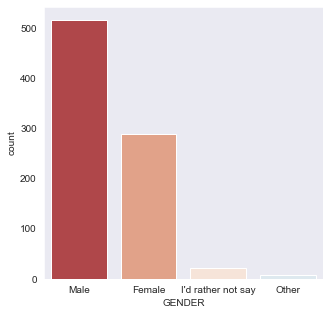

In [152]:
plt.figure(figsize=(5,5))
sns.set_palette("RdBu")
sns.countplot(candy["GENDER"])
plt.show()

we can see male is larger than female

# We will plot Age

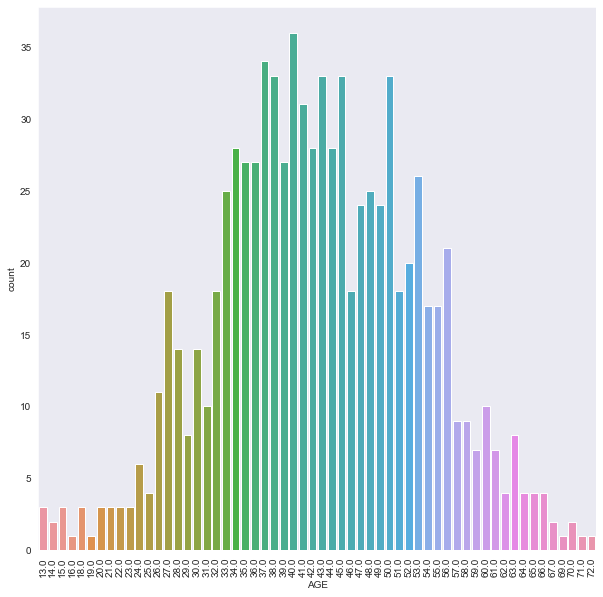

In [153]:
plt.figure(figsize=(10,10))
sns.countplot(candy["AGE"])
plt.xticks(rotation= 90)
plt.show()

we can see the most people who fill the servay are 40 years old

# We will plot Countery

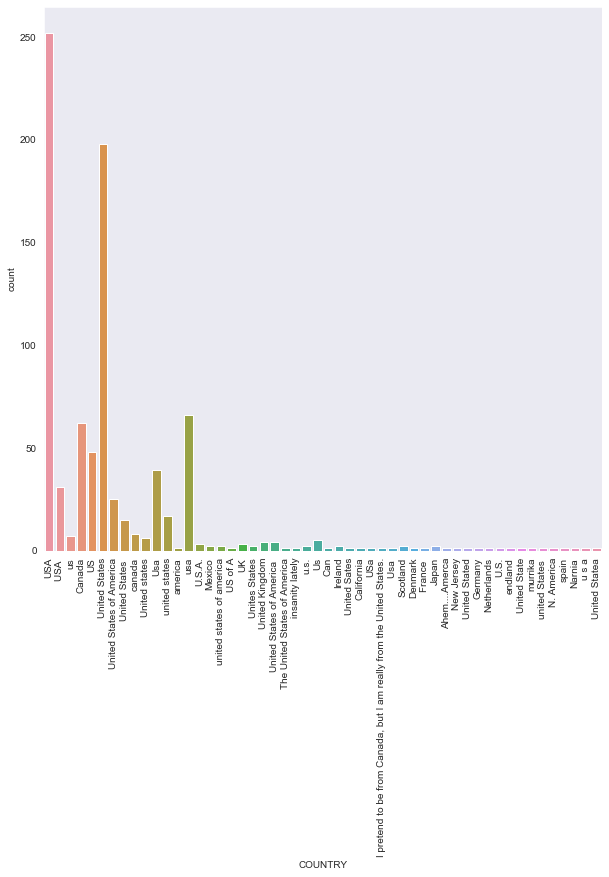

In [154]:
plt.figure(figsize=(10,10))
sns.countplot(candy["COUNTRY"])
plt.xticks(rotation= 90)
plt.show()

Most people from USA

# finally, we finish this data